# **World Happiness Report 2017 Analysis**

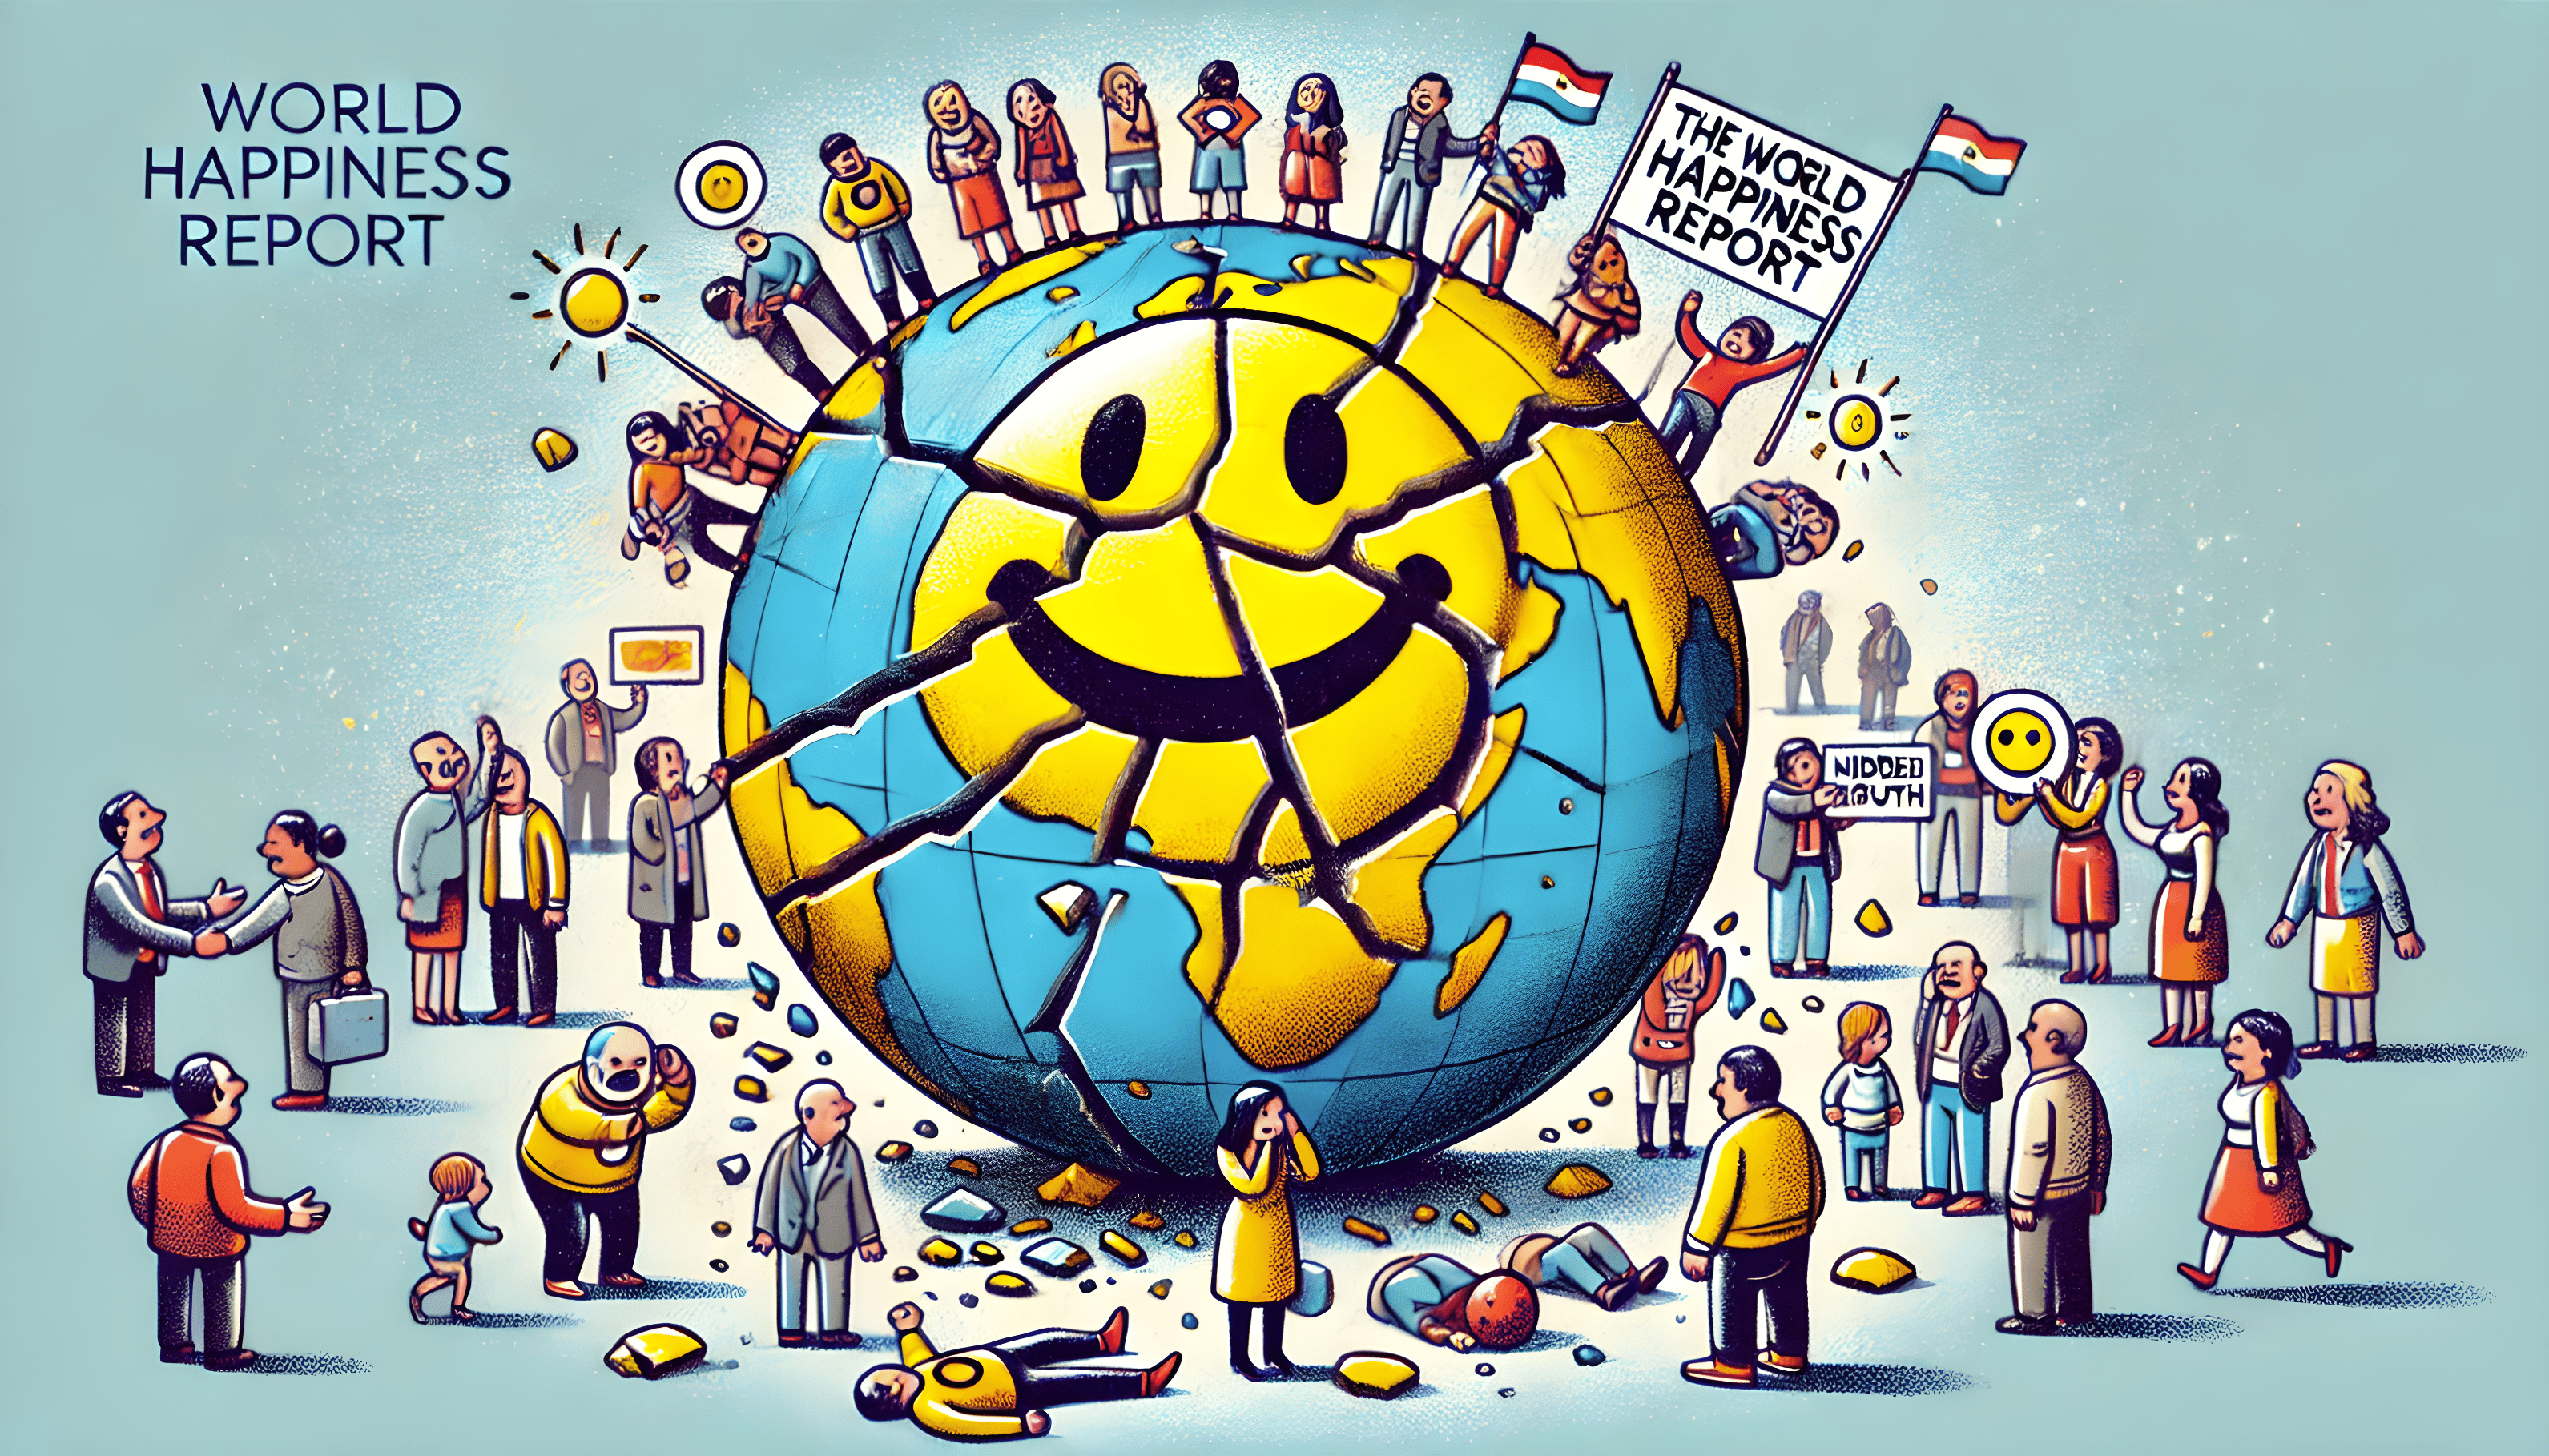

Student: Bharati Sahani

TUID: 916696310

Professor: Yiwei Chen

Data Source: [Kaggle](https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2017.csv)

# **1. Data Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

print(" Libraries imported successfully!")

 Libraries imported successfully!


#**2. Data Loading and Exploration**

In [ ]:
# Load the dataset
df = pd.read_csv('World Happiness Report_2017.csv')

# Information about the dataset
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Countries: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print("\n")

print("FIRST 5 ROWS")
print("=" * 50)
# Display first 5 rows with values rounded to 2 decimal place
display(df.head().round(2))

print("\nDATASET INFORMATION")
print("=" * 50)
df.info()

DATASET OVERVIEW
Dataset Shape: (155, 12)
Number of Countries: 155
Number of Features: 12


FIRST 5 ROWS


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1             7.54          7.59         7.48   
1      Denmark               2             7.52          7.58         7.46   
2      Iceland               3             7.50          7.62         7.39   
3  Switzerland               4             7.49          7.56         7.43   
4      Finland               5             7.47          7.53         7.41   

   Economy..GDP.per.Capita.  Family  Health..Life.Expectancy.  Freedom  \
0                      1.62    1.53                      0.80     0.64   
1                      1.48    1.55                      0.79     0.63   
2                      1.48    1.61                      0.83     0.63   
3                      1.56    1.52                      0.86     0.62   
4                      1.44    1.54                      0.81     0.62   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0        0.36                           0.32               2.28  
1        0.36                           0.40               2.31  
2        0.48                           0.15               2.32  
3        0.29                           0.37               2.28  
4        0.25                           0.38               2.43


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), obj

# **3. Understanding Data Structure and Checking for "Dirty" Data**

In [ ]:
print("CHECKING FOR 'DIRTY' DATA")
print("=" * 50)

# Check for missing values
print("Missing Values in Each Column:")
print("-" * 30)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")
else:
    print(f"Total missing values: {missing_values.sum()}")

print("\n")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
if duplicates == 0:
    print("No duplicate rows found!")
else:
    print("Duplicate rows need to be removed!")

print("\n")

# Check data types
print("Data Types:")
print("-" * 30)
print(df.dtypes)
print("\n")

# Statistical summary with rounding
print("STATISTICAL SUMMARY")
print("=" * 50)
# Display descriptive statistics rounded to 2 decimal place
display(df.describe().round(2))

CHECKING FOR 'DIRTY' DATA
Missing Values in Each Column:
------------------------------
Series([], dtype: int64)
No missing values found!


Duplicate Rows: 0
No duplicate rows found!


Data Types:
------------------------------
Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object


STATISTICAL SUMMARY


Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count          155.00           155.00        155.00       155.00   
mean            78.00             5.35          5.45         5.26   
std             44.89             1.13          1.12         1.15   
min              1.00             2.69          2.86         2.52   
25%             39.50             4.51          4.61         4.37   
50%             78.00             5.28          5.37         5.19   
75%            116.50             6.10          6.19         6.01   
max            155.00             7.54          7.62         7.48   

       Economy..GDP.per.Capita.  Family  Health..Life.Expectancy.  Freedom  \
count                    155.00  155.00                    155.00   155.00   
mean                       0.98    1.19                      0.55     0.41   
std                        0.42    0.29                      0.24     0.15   
min                        0.00    0.00                      0.00     0.00   
25%                        0.66    1.04                      0.37     0.30   
50%                        1.06    1.25                      0.61     0.44   
75%                        1.32    1.41                      0.72     0.52   
max                        1.87    1.61                      0.95     0.66   

       Generosity  Trust..Government.Corruption.  Dystopia.Residual  
count      155.00                         155.00             155.00  
mean         0.25                           0.12               1.85  
std          0.13                           0.10               0.50  
min          0.00                           0.00               0.38  
25%          0.15                           0.06               1.59  
50%          0.23                           0.09               1.83  
75%          0.32                           0.15               2.14  
max          0.84                           0.46               3.12

# **4. Data Cleaning**

In [ ]:
# Since our dataset appears clean, let's demonstrate how we would handle missing data
print("DATA CLEANING DEMONSTRATION")
print("=" * 50)

# Create a copy for demonstration
df_clean = df.copy()

# Check for any potential outliers or inconsistencies
print("Checking for potential data issues:")
print("-" * 40)

# Check for negative values where they shouldn't exist
negative_checks = {}
for col in df_clean.select_dtypes(include=[np.number]).columns:
    if (df_clean[col] < 0).any():
        negative_checks[col] = (df_clean[col] < 0).sum()

if negative_checks:
    print("Columns with negative values:")
    for col, count in negative_checks.items():
        print(f"   {col}: {count} negative values")
else:
    print("No unexpected negative values found")

print("\n")

# Check for unrealistic values
print("Checking for unrealistic values (e.g., scores > 10):")
print("-" * 40)
unrealistic = (df_clean['Happiness.Score'] > 10).sum()
print(f"Happiness scores > 10: {unrealistic}")
if unrealistic == 0:
    print("All happiness scores are within reasonable range")

DATA CLEANING DEMONSTRATION
Checking for potential data issues:
----------------------------------------
No unexpected negative values found


Checking for unrealistic values (e.g., scores > 10):
----------------------------------------
Happiness scores > 10: 0
All happiness scores are within reasonable range


# **5. Exploratory Data Analysis (EDA)**

5.1. Top and Bottom 10 Happiest Countries

TOP 10 HAPPIEST COUNTRIES


Country  Happiness.Score
0       Norway            7.537
1      Denmark            7.522
2      Iceland            7.504
3  Switzerland            7.494
4      Finland            7.469
5  Netherlands            7.377
6       Canada            7.316
7  New Zealand            7.314
8       Sweden            7.284
9    Australia            7.284



BOTTOM 10 HAPPIEST COUNTRIES


Country  Happiness.Score
154  Central African Republic            2.693
153                   Burundi            2.905
152                  Tanzania            3.349
151                     Syria            3.462
150                    Rwanda            3.471
149                      Togo            3.495
148                    Guinea            3.507
147                   Liberia            3.533
146               South Sudan            3.591
145                     Yemen            3.593

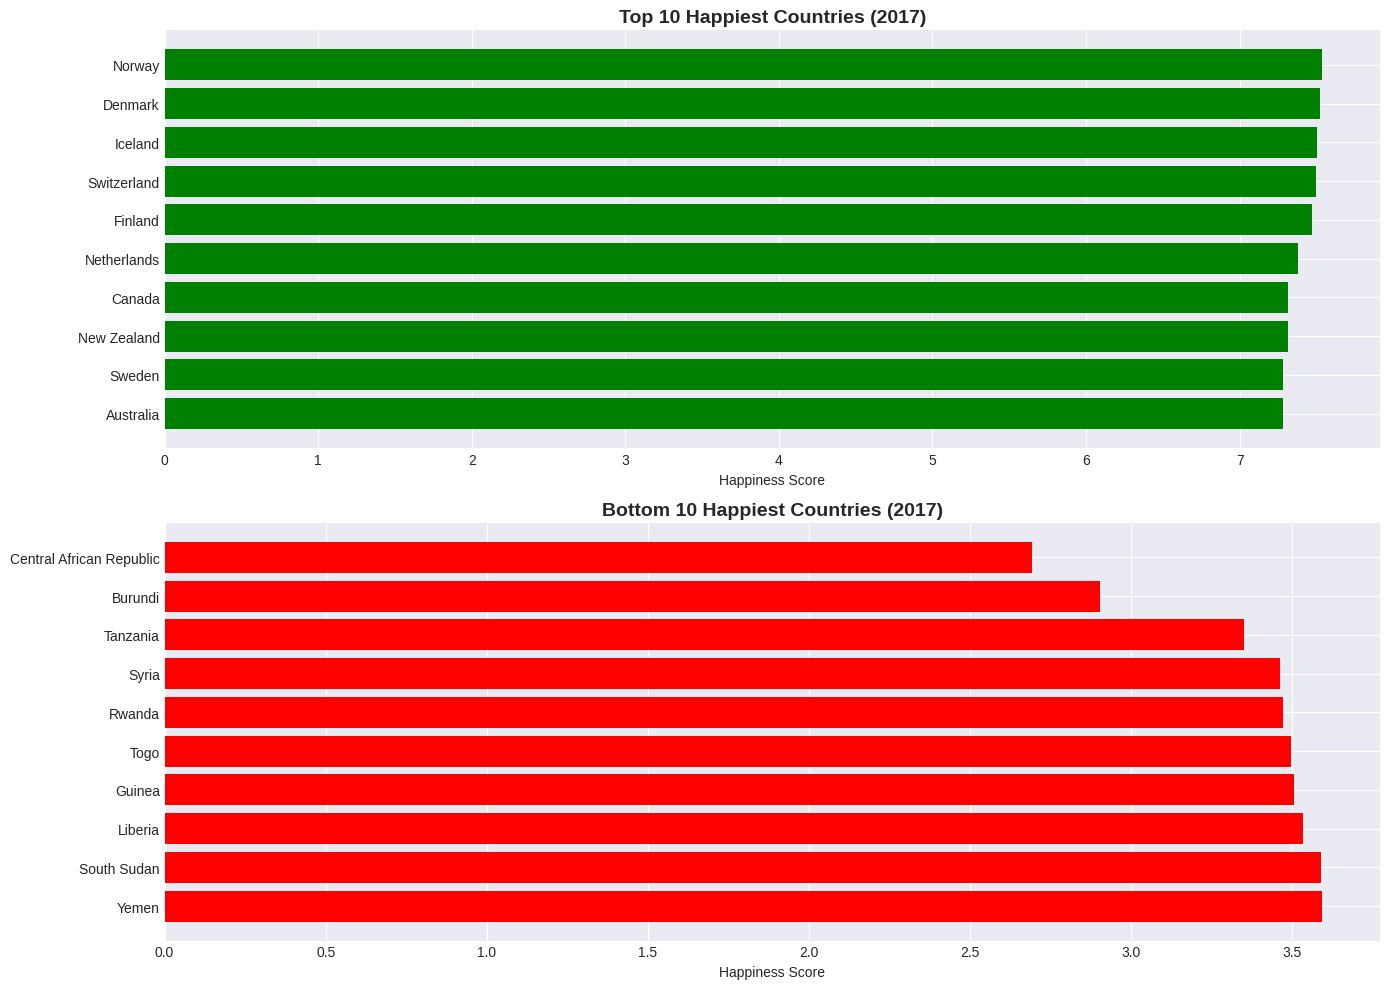

In [ ]:
print("TOP 10 HAPPIEST COUNTRIES")
print("=" * 50)
top_10 = df_clean.nlargest(10, 'Happiness.Score')[['Country', 'Happiness.Score']]
display(top_10)

print("\n")

print("BOTTOM 10 HAPPIEST COUNTRIES")
print("=" * 50)
bottom_10 = df_clean.nsmallest(10, 'Happiness.Score')[['Country', 'Happiness.Score']]
display(bottom_10)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Top 10
axes[0].barh(top_10['Country'], top_10['Happiness.Score'], color='green')
axes[0].set_xlabel('Happiness Score')
axes[0].set_title('Top 10 Happiest Countries (2017)', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Bottom 10
axes[1].barh(bottom_10['Country'], bottom_10['Happiness.Score'], color='red')
axes[1].set_xlabel('Happiness Score')
axes[1].set_title('Bottom 10 Happiest Countries (2017)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

5.2. Distribution of Happiness Scores

DISTRIBUTION OF HAPPINESS SCORES


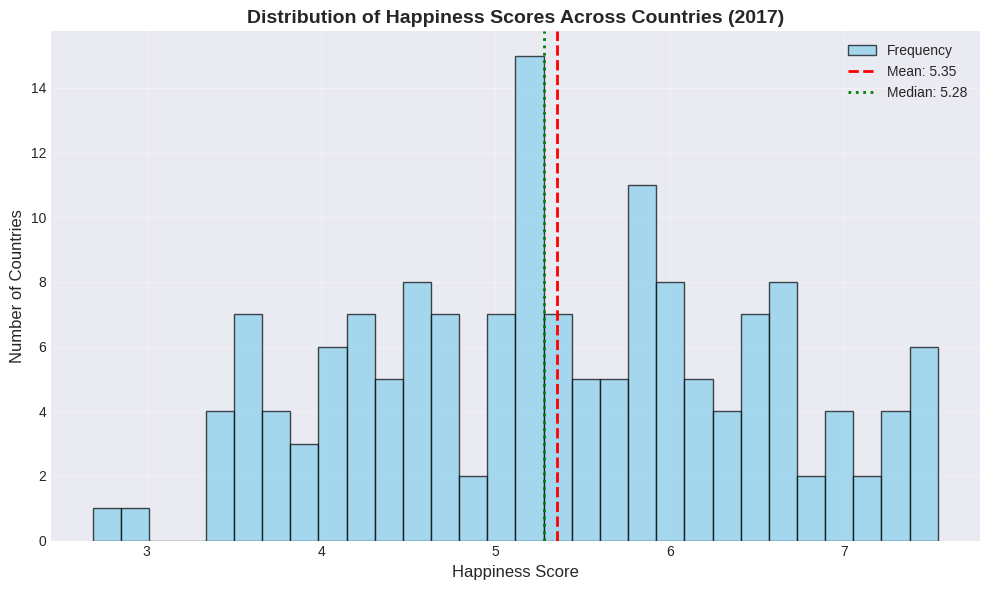


 HAPPINESS SCORE STATISTICS:
----------------------------------------
Mean: 5.35
Median: 5.28
Standard Deviation: 1.13
Minimum: 2.69 (Central African Republic)
Maximum: 7.54 (Norway)
Range: 4.84
Number of Countries: 155

 DISTRIBUTION INSIGHTS:
----------------------------------------
25th Percentile (Q1): 4.51
75th Percentile (Q3): 6.10
Interquartile Range (IQR): 1.60

 COUNTRIES BY HAPPINESS RANGE:
----------------------------------------
Very Low (<4)        :  20 countries (12.9%)
Low (4-5)            :  37 countries (23.9%)
Moderate (5-6)       :  53 countries (34.2%)
High (6-7)           :  32 countries (20.6%)
Very High (≥7)       :  13 countries (8.4%)


In [ ]:
print("DISTRIBUTION OF HAPPINESS SCORES")
print("=" * 50)

# Create a plot for the histogram
plt.figure(figsize=(10, 6))

# Histogram with distribution curve
plt.hist(df_clean['Happiness.Score'], bins=30, edgecolor='black', alpha=0.7,
         density=False, color='skyblue', label='Frequency')

# Add mean line
mean_score = df_clean['Happiness.Score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2,
            label=f"Mean: {mean_score:.2f}")

# Add median line
median_score = df_clean['Happiness.Score'].median()
plt.axvline(median_score, color='green', linestyle=':', linewidth=2,
            label=f"Median: {median_score:.2f}")

# Add normal distribution curve for comparison
from scipy import stats
if 'scipy' in globals():
    x = np.linspace(df_clean['Happiness.Score'].min(), df_clean['Happiness.Score'].max(), 100)
    y = stats.norm.pdf(x, mean_score, df_clean['Happiness.Score'].std())
    plt.plot(x, y * len(df_clean) * (df_clean['Happiness.Score'].max() - df_clean['Happiness.Score'].min()) / 30,
             'r-', alpha=0.7, label='Normal Distribution')

plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.title('Distribution of Happiness Scores Across Countries (2017)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n HAPPINESS SCORE STATISTICS:")
print("-" * 40)
print(f"Mean: {df_clean['Happiness.Score'].mean():.2f}")
print(f"Median: {df_clean['Happiness.Score'].median():.2f}")
print(f"Standard Deviation: {df_clean['Happiness.Score'].std():.2f}")
print(f"Minimum: {df_clean['Happiness.Score'].min():.2f} ({df_clean.loc[df_clean['Happiness.Score'].idxmin(), 'Country']})")
print(f"Maximum: {df_clean['Happiness.Score'].max():.2f} ({df_clean.loc[df_clean['Happiness.Score'].idxmax(), 'Country']})")
print(f"Range: {df_clean['Happiness.Score'].max() - df_clean['Happiness.Score'].min():.2f}")
print(f"Number of Countries: {len(df_clean)}")

# Additional insights about the distribution
print("\n DISTRIBUTION INSIGHTS:")
print("-" * 40)
q25 = df_clean['Happiness.Score'].quantile(0.25)
q75 = df_clean['Happiness.Score'].quantile(0.75)
iqr = q75 - q25
print(f"25th Percentile (Q1): {q25:.2f}")
print(f"75th Percentile (Q3): {q75:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")

# Count countries in different score ranges
print("\n COUNTRIES BY HAPPINESS RANGE:")
print("-" * 40)
ranges = [
    ("Very Low (<4)", (df_clean['Happiness.Score'] < 4).sum()),
    ("Low (4-5)", ((df_clean['Happiness.Score'] >= 4) & (df_clean['Happiness.Score'] < 5)).sum()),
    ("Moderate (5-6)", ((df_clean['Happiness.Score'] >= 5) & (df_clean['Happiness.Score'] < 6)).sum()),
    ("High (6-7)", ((df_clean['Happiness.Score'] >= 6) & (df_clean['Happiness.Score'] < 7)).sum()),
    ("Very High (≥7)", (df_clean['Happiness.Score'] >= 7).sum())
]

for label, count in ranges:
    percentage = (count / len(df_clean)) * 100
    print(f"{label:20} : {count:3} countries ({percentage:.1f}%)")

# **6. Outlier Detection and Handling**

OUTLIER DETECTION
Lower bound: 2.11
Upper bound: 8.50
Number of outliers in Happiness.Score: 0
No outliers detected in happiness scores!


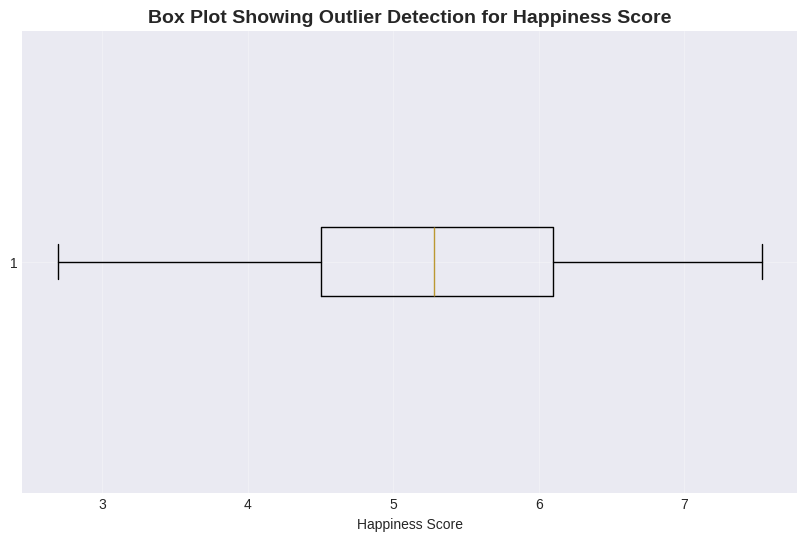

In [ ]:
print("OUTLIER DETECTION")
print("=" * 50)

# Using IQR method for outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check for outliers in happiness score
outliers, lower_bound, upper_bound = detect_outliers_iqr(df_clean, 'Happiness.Score')

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers in Happiness.Score: {len(outliers)}")

if len(outliers) > 0:
    print("\n Detected Outliers:")
    print("-" * 30)
    display(outliers[['Country', 'Happiness.Score']])
else:
    print("No outliers detected in happiness scores!")

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['Happiness.Score'], vert=False)
plt.xlabel('Happiness Score')
plt.title('Box Plot Showing Outlier Detection for Happiness Score', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# **7. Group Analysis**

GROUP ANALYSIS
Happiness Category Distribution:
----------------------------------------
High       :  32 countries (20.6%)
Low        :  37 countries (23.9%)
Medium     :  53 countries (34.2%)
Very High  :  13 countries (8.4%)
Very Low   :  20 countries (12.9%)


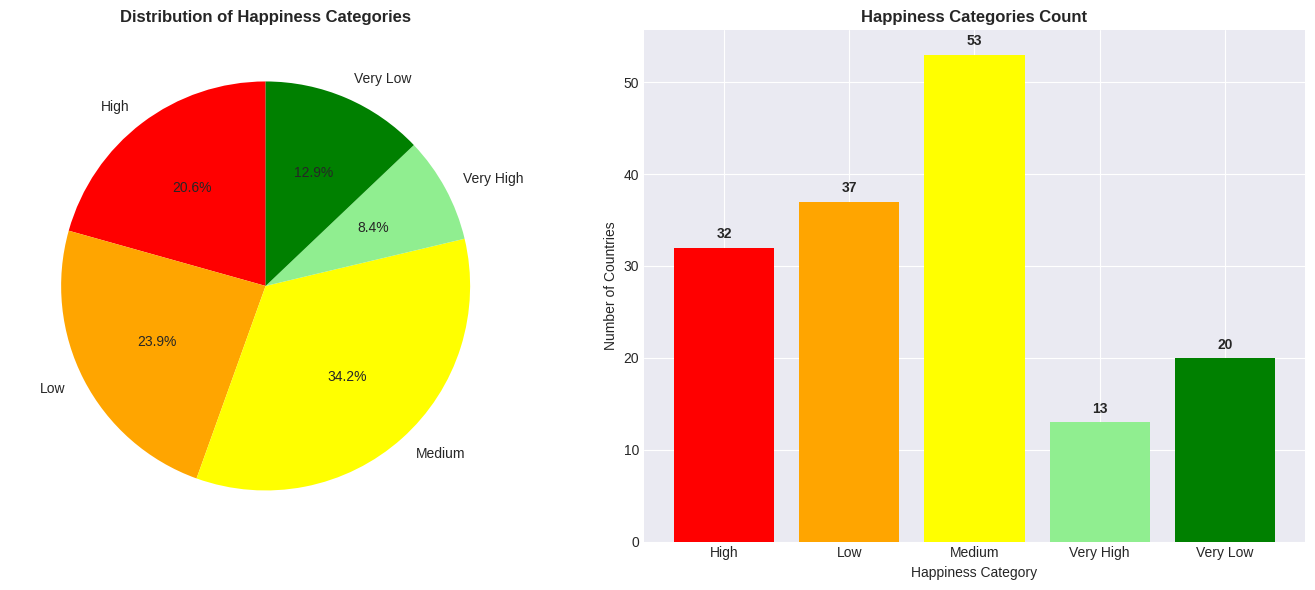

In [ ]:
# Grouping based on happiness score ranges
print("GROUP ANALYSIS")
print("=" * 50)

# Create happiness categories
def categorize_happiness(score):
    if score >= 7:
        return 'Very High'
    elif score >= 6:
        return 'High'
    elif score >= 5:
        return 'Medium'
    elif score >= 4:
        return 'Low'
    else:
        return 'Very Low'

df_clean['happiness_category'] = df_clean['Happiness.Score'].apply(categorize_happiness)

# Display category distribution
category_dist = df_clean['happiness_category'].value_counts().sort_index()
print("Happiness Category Distribution:")
print("-" * 40)
for category, count in category_dist.items():
    print(f"{category:10} : {count:3} countries ({count/len(df_clean)*100:.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
axes[0].pie(category_dist.values, labels=category_dist.index, autopct='%1.1f%%',
           startangle=90, colors=['red', 'orange', 'yellow', 'lightgreen', 'green'])
axes[0].set_title('Distribution of Happiness Categories', fontsize=12, fontweight='bold')

# Bar chart
axes[1].bar(category_dist.index, category_dist.values, color=['red', 'orange', 'yellow', 'lightgreen', 'green'])
axes[1].set_xlabel('Happiness Category')
axes[1].set_ylabel('Number of Countries')
axes[1].set_title('Happiness Categories Count', fontsize=12, fontweight='bold')
for i, v in enumerate(category_dist.values):
    axes[1].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **8. Correlation Analysis**

CORRELATION ANALYSIS
Correlation with Happiness Score:
----------------------------------------
Whisker.low                    : +1.000
Whisker.high                   : +0.999
Economy..GDP.per.Capita.       : +0.812
Health..Life.Expectancy.       : +0.782
Family                         : +0.753
Freedom                        : +0.570
Dystopia.Residual              : +0.475
Trust..Government.Corruption.  : +0.429
Generosity                     : +0.155
Happiness.Rank                 : -0.993


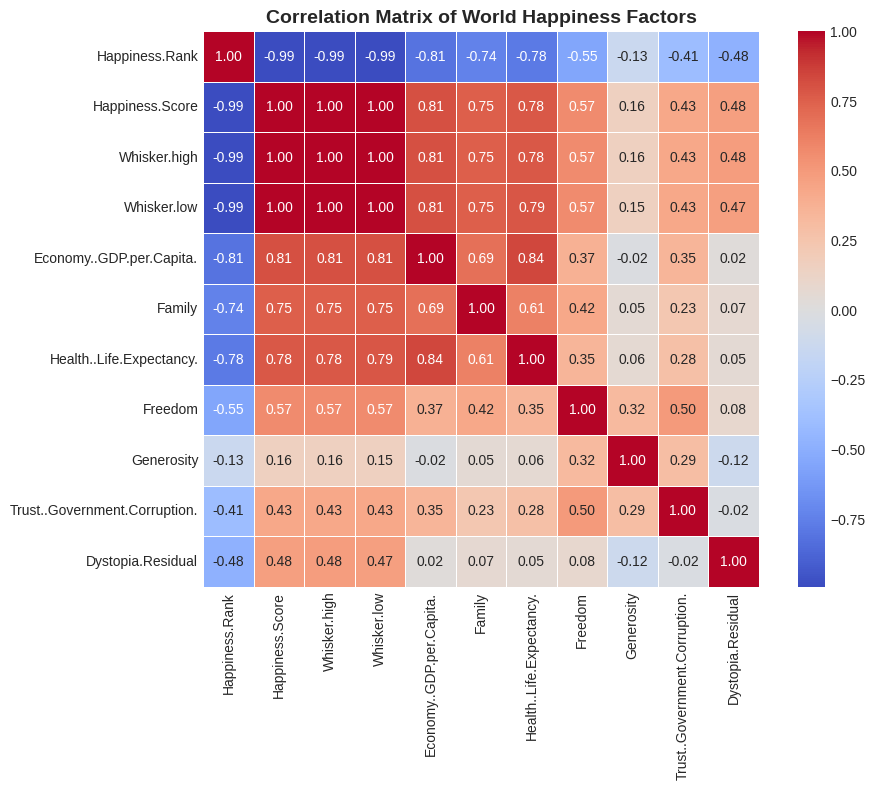

In [ ]:
print("CORRELATION ANALYSIS")
print("=" * 50)

numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_cols].corr()

# Correlation with happiness score
happiness_corr = correlation_matrix['Happiness.Score'].sort_values(ascending=False)

print("Correlation with Happiness Score:")
print("-" * 40)
for feature, corr in happiness_corr.items():
    if feature != 'Happiness.Score':
        print(f"{feature:30} : {corr:+.3f}")

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix of World Happiness Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# **9. Summary**

9.1. Key Findings

In [ ]:
print("KEY INSIGHTS FROM WORLD HAPPINESS REPORT 2017:")
print("=" * 50)

if 'df_clean' in globals():

    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    happiness_corr = df_clean[numerical_cols].corr()['Happiness.Score'].sort_values(ascending=False)

    top_factor = happiness_corr.iloc[1]
    top_factor_name = happiness_corr.index[1]

    insights = [
        f"• Average happiness score: {df_clean['Happiness.Score'].mean():.2f}",
        f"• Happiest country: {df_clean.loc[df_clean['Happiness.Score'].idxmax(), 'Country']} ({df_clean['Happiness.Score'].max():.2f})",
        f"• Least happy country: {df_clean.loc[df_clean['Happiness.Score'].idxmin(), 'Country']} ({df_clean['Happiness.Score'].min():.2f})",
        f"• Top factor correlated with happiness: {top_factor_name} ({top_factor:.3f})",
        f"• Countries with very high happiness (≥7): {(df_clean['Happiness.Score'] >= 7).sum()}",
        f"• Countries with very low happiness (<4): {(df_clean['Happiness.Score'] < 4).sum()}"
    ]

    for insight in insights:
        print(insight)
else:
    print("Error: df_clean not found. Please run the data loading and processing cells first.")

print("\n" + "=" * 50)

KEY INSIGHTS FROM WORLD HAPPINESS REPORT 2017:
• Average happiness score: 5.35
• Happiest country: Norway (7.54)
• Least happy country: Central African Republic (2.69)
• Top factor correlated with happiness: Whisker.low (1.000)
• Countries with very high happiness (≥7): 13
• Countries with very low happiness (<4): 20



9.2. Executive Summary

The objective of this project was to perform a comprehensive data analysis on the World Happiness Report 2017, translating statistical relationships into tangible insights about global well-being. Our analysis of the 155 surveyed countries revealed a stark global contrast, from the peak happiness score of 7.54 in Norway to the lowest score of 2.69 in the Central African Republic.

The data unequivocally shows that the most significant predictors of national happiness are economic and social stability. Specifically, our correlation analysis highlights that Economic Production (GDP per capita) and Social Support (Family) are the two primary pillars that underpin a nation's collective well-being. This aligns with the report's conceptual framework, which emphasizes the foundational role of having a decent standard of living and a robust social safety net.

Crucially, the uneven distribution of happiness is a major takeaway. While a small elite of 13 nations enjoys very high happiness scores (7.0 and above), a concerning 20 countries are clustered at the very low end (below 4.0). This demonstrates that the factors driving happiness are not universally accessible, highlighting a significant global challenge in equitable development.

# **10. Conclusion: Insights and Implications**

This project underscores a fundamental truth about human well-being: happiness is not merely an abstract emotion, but a function of measurable, structural societal conditions.

From a Policy and Reliability Perspective:


*   The Power of Stability: The strong correlation between happiness and GDP per Capita, Social Support, and Health (Life Expectancy) is a reliable finding that consistently emerges from global happiness studies. These factors represent a nation's ability to provide citizens with stability, security, and a future free from undue hardship.

*   Beyond Economics: While economic strength is a dominant factor, the profound impact of the Social Support variable highlights that community and strong interpersonal relationships are irreplaceable components of well-being. This suggests that policy should not only focus on wealth creation but also on initiatives that foster trust and social cohesion.

*   The Role of Other Factors: Although less dominant than the primary three, the positive contributions of Freedom and Generosity offer a valuable human dimension. They suggest that the freedom to make life choices and a culture of contributing to others are essential for feeling a sense of meaning and purpose.

*   The Dystopia Residual: Finally, the 'Dystopia.Residual' column, which accounts for the unexplained portion of a country’s score, serves as a powerful reminder of factors beyond our measured variables, such as unique cultural values, history, and psychological resilience. Future research could explore these latent variables for a more complete picture.

In conclusion, the data confirms that a meaningful and lasting increase in national happiness requires a dual commitment: to developing economic and health infrastructure while simultaneously investing in the social factors that gives life meaning.